In [1]:
import numpy as np

In [2]:
dia_hebra = 0.27 # mm
# 
F_hebra = 3.5 # 3.241 # kg
F_hebra_sin_corr = 3.241 # kg
F_hebra_kg = F_hebra
F_hebra = 9.81*F_hebra # N
A_hebra = np.pi*(dia_hebra/2)**2
sigma_hebra = F_hebra/A_hebra # MPa

F_trenzado = 142 # kg
F_trenzado_con_alma = 177 # kg
F_trenzado_kg = F_trenzado
F_trenzado = 9.81*F_trenzado # N
dia_trenzado = 4 # mm

# 4 monofilamentos x 16 + 15 monofilamentos en alma
theta = 85 # grados
ctheta = np.sin(np.deg2rad(theta))
Nalma = 15
Atrenzado = (ctheta*16*4 + Nalma)*np.pi*(dia_hebra/2)**2 
sigma_trenzado = F_trenzado/Atrenzado # MPa

# homogenized 
Atrenzado_homogenized = np.pi*(dia_trenzado/2)**2
sigma_trenzado_homogenized = F_trenzado/Atrenzado_homogenized # MPa
# print with 2 decimals
print(f"sigma_trenzado = {sigma_trenzado:.2f} MPa")
print(f"sigma_hebra = {sigma_hebra:.2f} MPa")
print(f"sigma_trenzado_homogenized = {sigma_trenzado_homogenized:.2f} MPa")
# 
# ratio 
ratio = sigma_trenzado/sigma_hebra
print(f"ratio = {ratio:.3f}")

sigma_trenzado = 308.93 MPa
sigma_hebra = 599.68 MPa
sigma_trenzado_homogenized = 110.85 MPa
ratio = 0.515


In [3]:
from tools.step.runstep import runstep,address,lj
import os


In [4]:
import glob

In [5]:
files = glob.glob('output/*.json')

In [6]:
file = files[-4]

In [7]:
results = []
for file in files:

    try:
        id_sim = os.path.basename(file).replace('.json','')

        params = lj(id_sim)
        psim = lj(params["simulation_path"])
        steps = params["results"]["frd"]["steps"]
        step_str =  [ i[:7 ] for i in steps ]
        step_str = np.array(step_str)    
        step_str_uq = np.unique(step_str)

        indx = [ np.where(step_str == iuq )[-1][-1] for iuq in step_str_uq]


        sigma_max = [i["sigma_max"] for i in params["results"]["measurements"]]
        epsilon = [i["epsilon"] for i in params["results"]["measurements"]]
        Ftotal = [i["F_total"] for i in params["results"]["measurements"]]

        lmp_params = lj(lj(psim["tensile_path"])["inflation_path"])["lammps_params"]
        h = lmp_params["h"]
        len_periodic = lmp_params["len_periodic"]        

        sigma_max = np.array(sigma_max)
        sigma_max = sigma_max[indx]

        epsilon = np.array(epsilon)
        epsilon = epsilon[indx]
        Ftotal = np.array(Ftotal)/9.81 # kg
        Ftotal = Ftotal[indx]

        measurements = params["results"]["measurements"]



        step_str_uq = step_str[indx]

        angle = 85
        ctheta = np.sin(np.deg2rad(angle))

        results.append({"id_sim":id_sim,
                        "step_str_uq":step_str_uq,"sigma_max":sigma_max,
                        "epsilon":epsilon,
                        "Ftotal":Ftotal,
                        "h":h,
                        "measurements":measurements,
                        "len_periodic":len_periodic,
        })

    except Exception as e:
        print(e)
        print(file)
        pass


Simulation not found
output\2024-08-28__15-36-34__74943.json
Simulation not found
output\2024-08-28__15-39-26__13887.json
Simulation not found
output\2024-08-28__16-43-16__54736.json
Simulation not found
output\2024-08-28__16-47-52__63559.json
Simulation not found
output\2024-08-28__16-48-46__90541.json
Simulation not found
output\2024-08-28__16-49-13__90917.json
Simulation not found
output\2024-08-28__16-50-37__89082.json
'len_periodic'
output\2024-08-28__16-52-22__82806.json
'len_periodic'
output\2024-08-29__09-55-17__37262.json
'len_periodic'
output\2024-08-29__13-44-20__11646.json
'len_periodic'
output\2024-08-29__14-11-17__71881.json
'len_periodic'
output\2024-08-29__14-53-13__88108.json
'len_periodic'
output\2024-08-29__16-44-57__79550.json
'len_periodic'
output\2024-08-29__17-19-58__83103.json
'len_periodic'
output\2024-08-29__17-20-52__22862.json
'len_periodic'
output\2024-08-29__18-22-29__86981.json
'len_periodic'
output\2024-08-29__18-23-32__39680.json
'len_periodic'
output\2

In [8]:
results[0]

{'id_sim': '2024-09-19__15-10-50__35011',
 'step_str_uq': array(['step_01', 'step_02', 'step_03', 'step_04'], dtype='<U7'),
 'sigma_max': array([ 26.34232204, 316.4178114 , 663.70750002, 911.39782169]),
 'epsilon': array([0.08768388, 0.35072992, 0.61378158, 0.87682761]),
 'Ftotal': array([  1.24165755,  34.6566105 , 105.61684129, 168.2772485 ]),
 'h': 14.237580932429118,
 'measurements': array([{'sigma_max': 26.34232203688855, 'F_total': 12.180660611999773, 'Ftrenzado': 12.180660611999773, 'Falma': 0.0, 'Delta_L': 0.15617999999999999, 'mt': [[27.976762160289944, 27.976762160289944, 17.66061631055015, 18.02998650532256, 18.02998650532256, 15.452754428860441, 11.044034369057742, 11.044034369057742, 8.690219655169233, 7.845713336259723, 7.845713336259723, 6.009442767799244, 5.50563730064175, 5.50563730064175, 6.03555818191874, 7.526555240925377, 7.526555240925377, 9.147268737305954, 11.735438534471028, 13.723080946367924], [26.495400143219467, 26.495400143219467, 22.24563174110659, 22.245

In [9]:
from matplotlib import pyplot as plt

C:\Users\djoroya\AppData\Local\Temp\ipykernel_16332\732117456.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10,10))


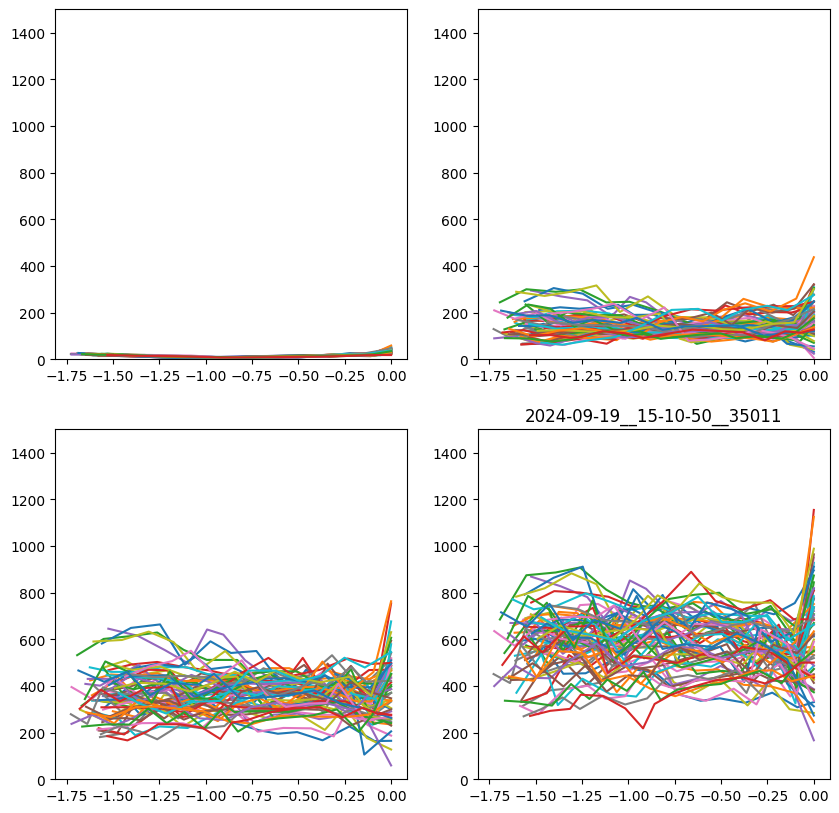

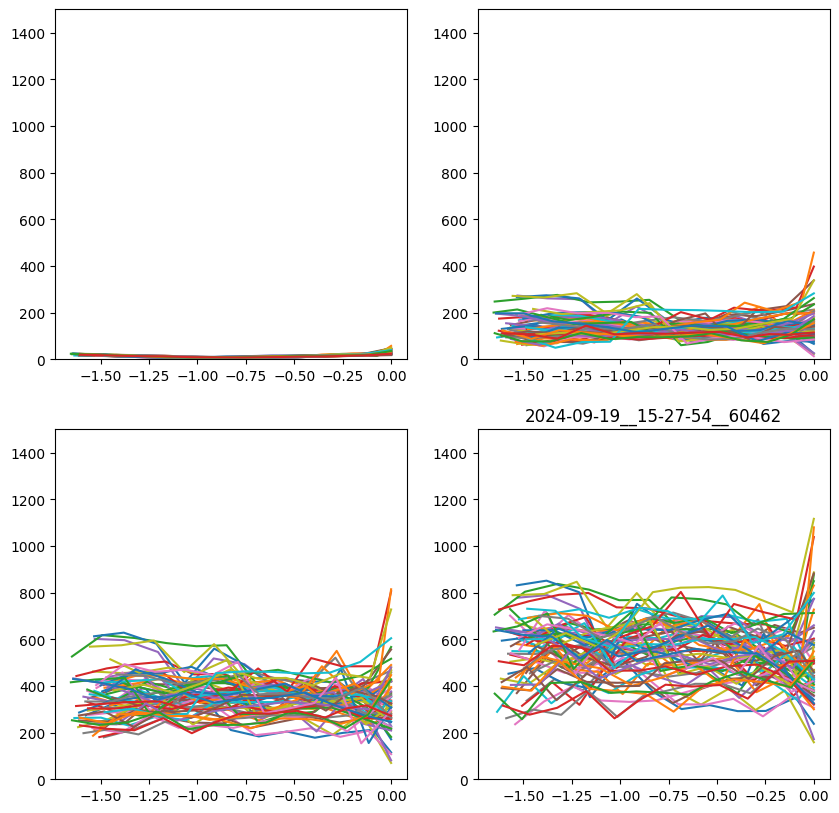

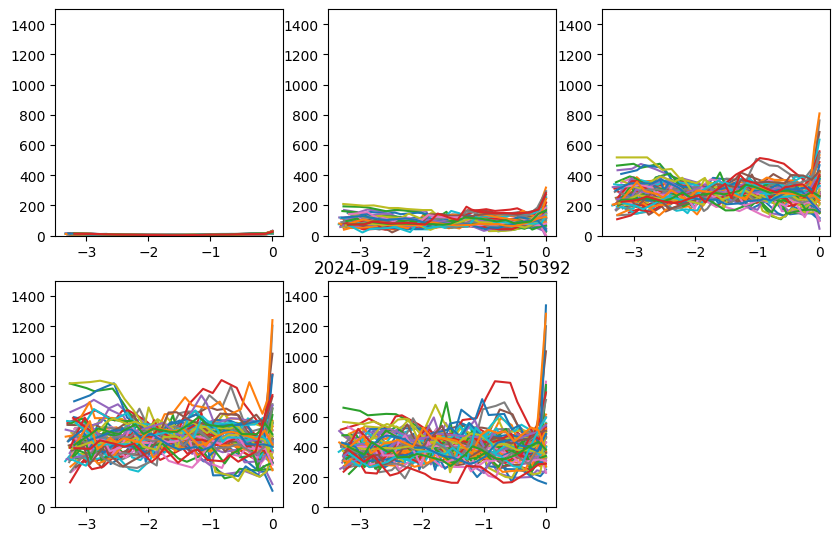

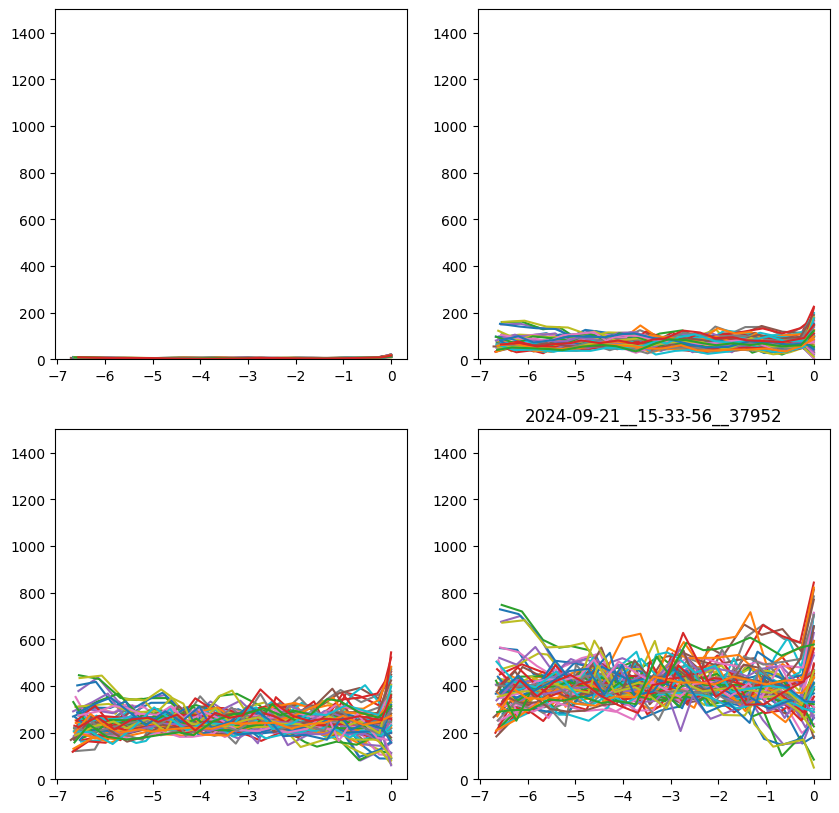

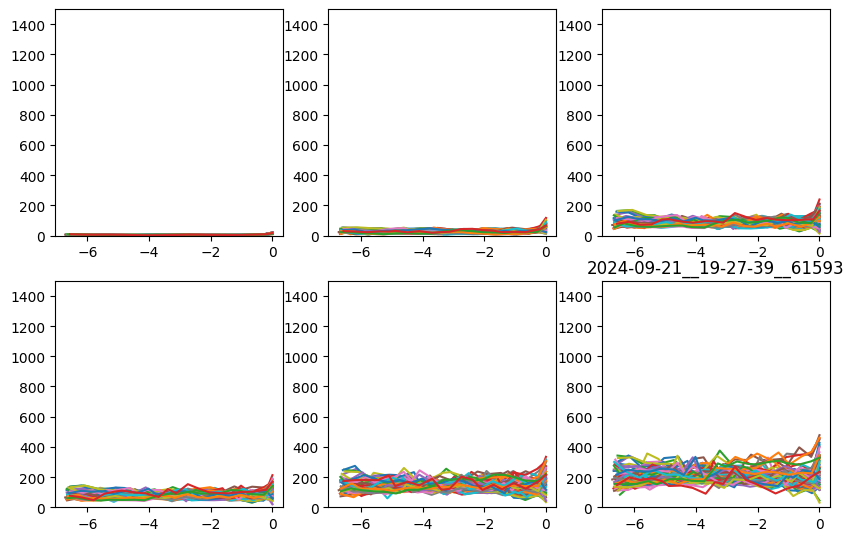

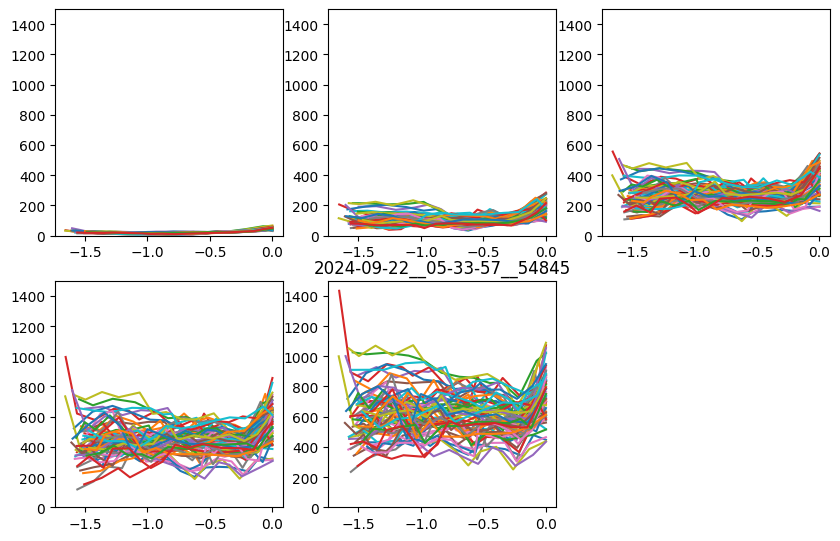

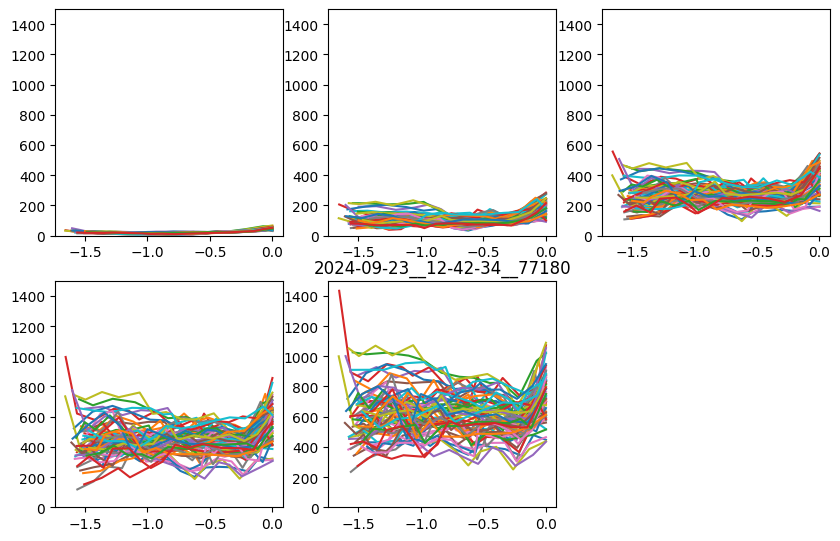

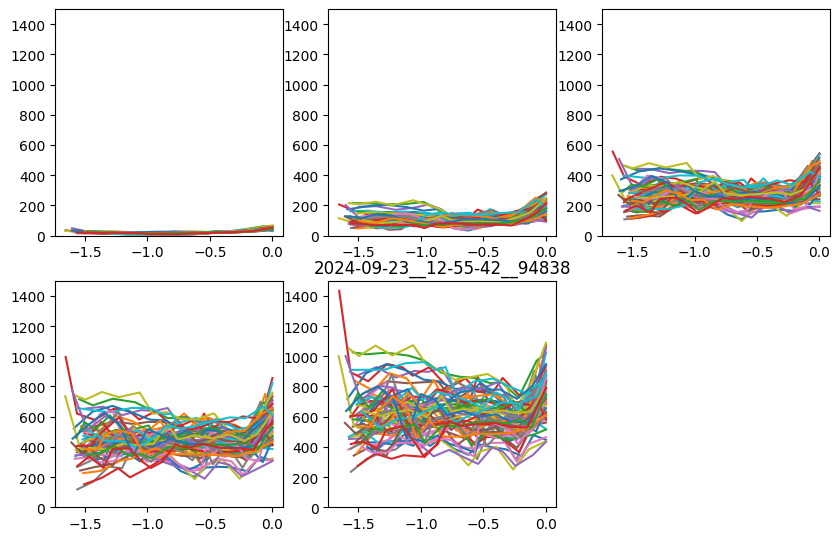

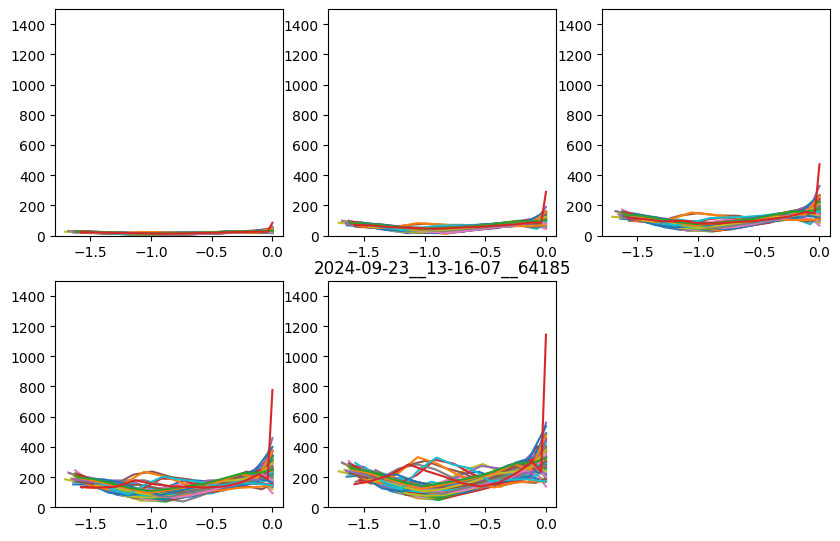

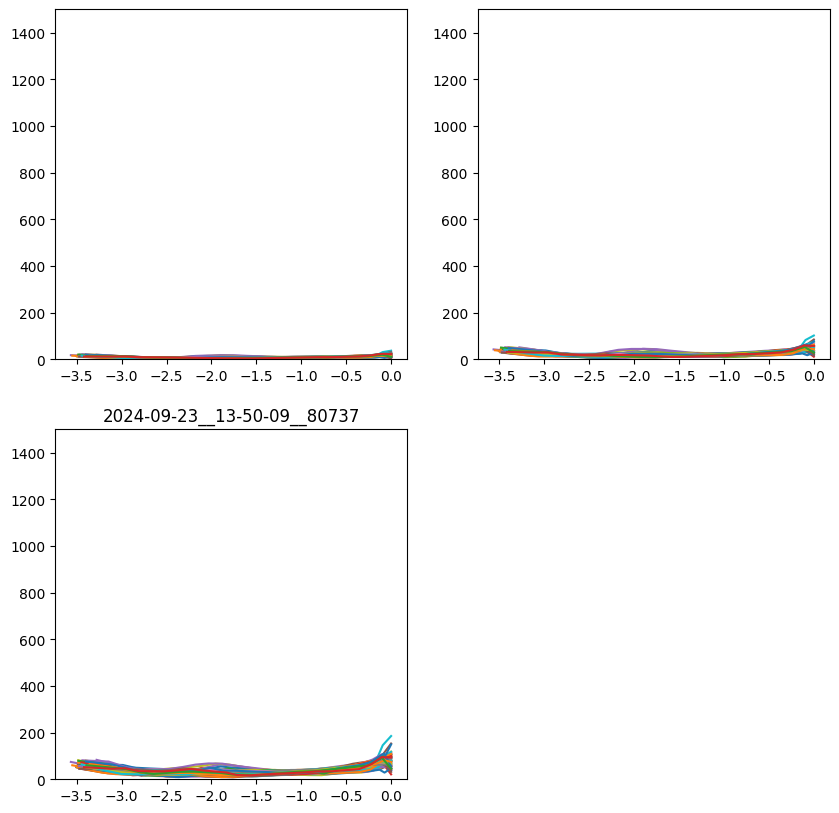

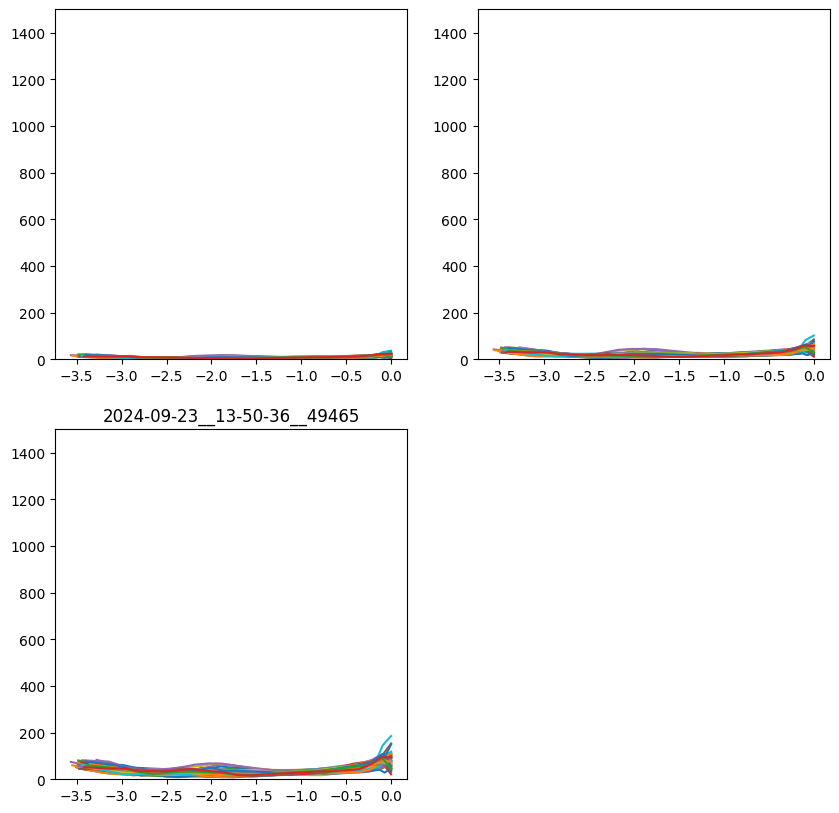

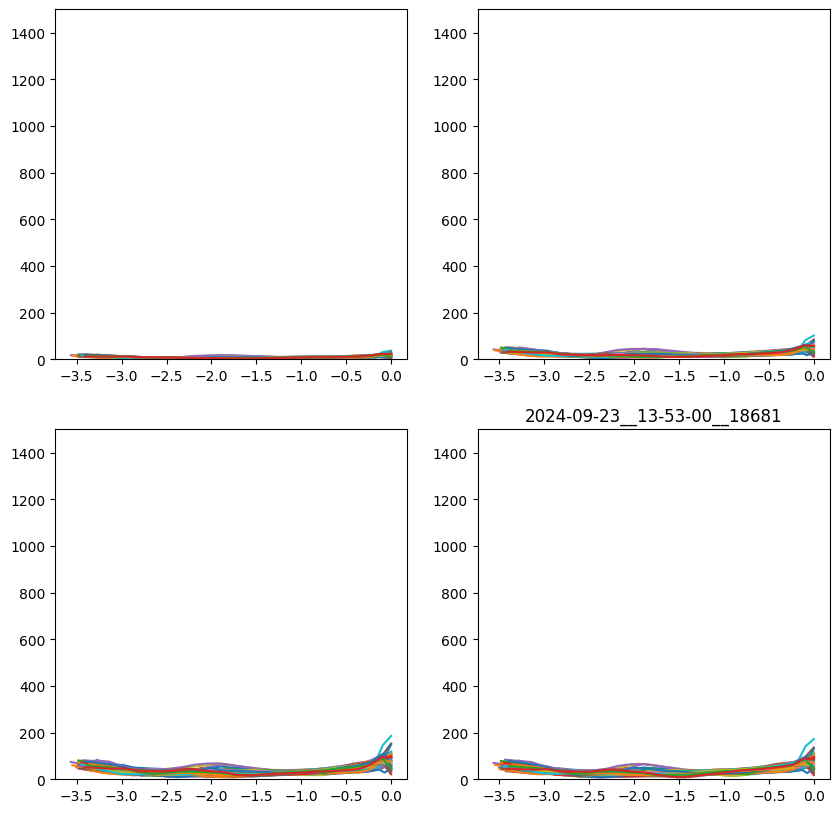

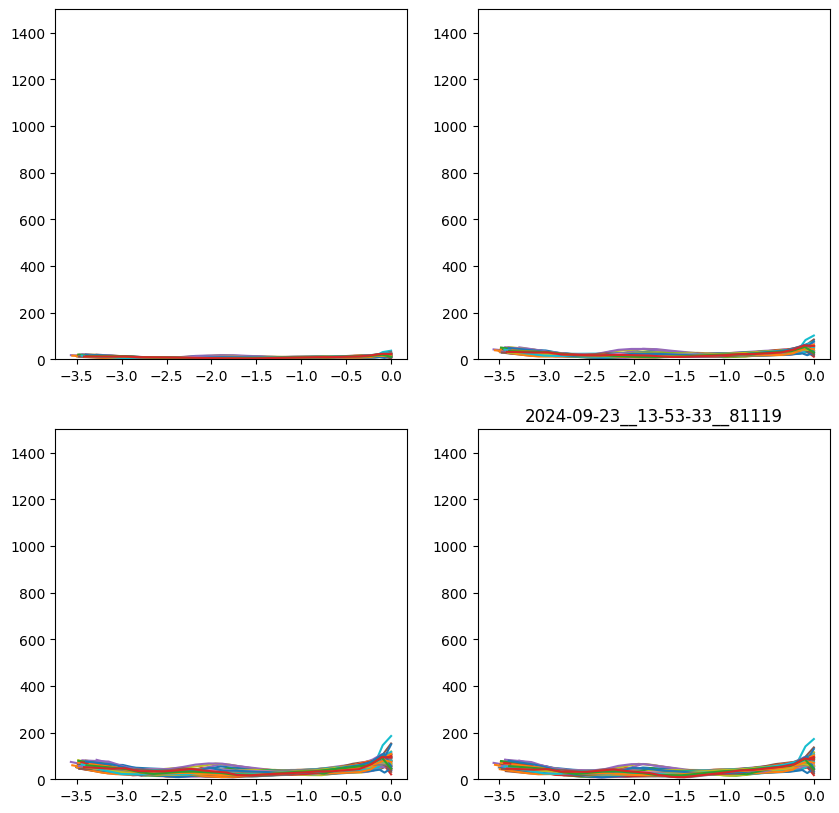

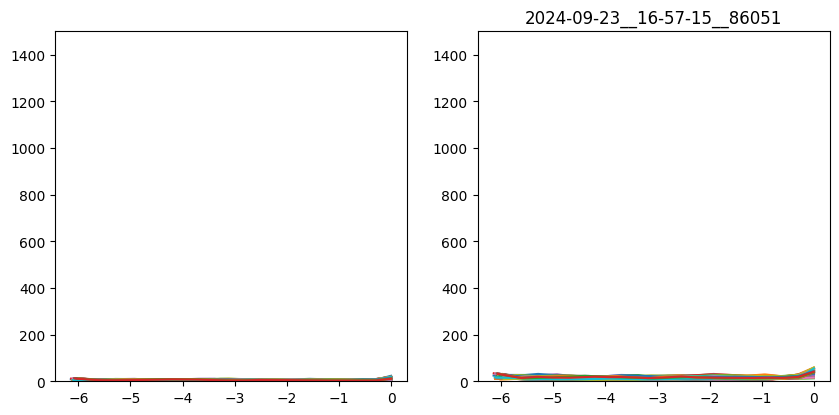

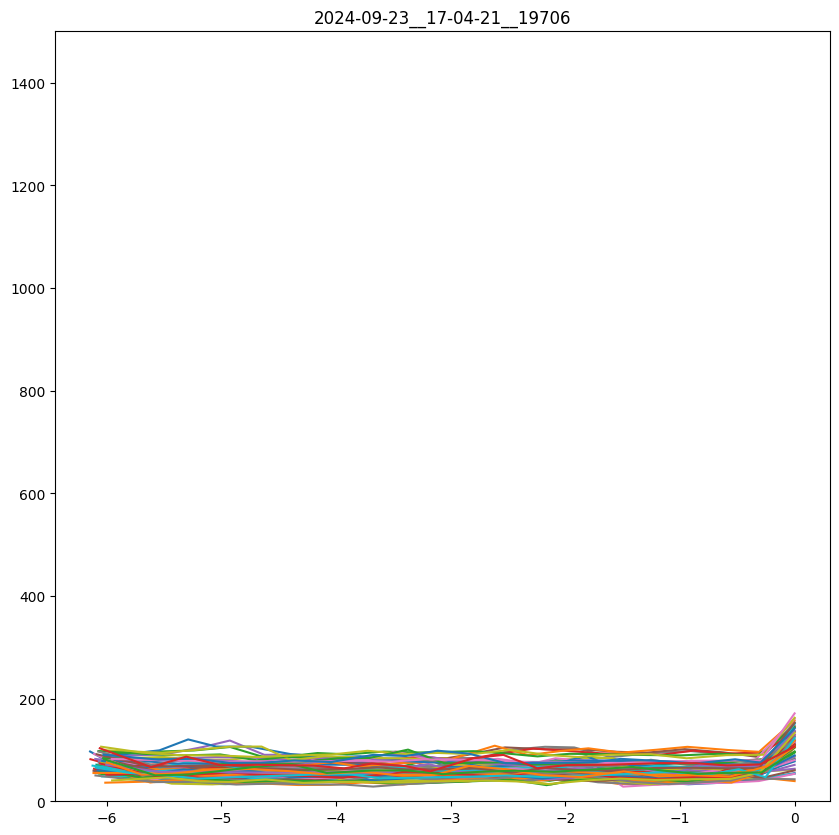

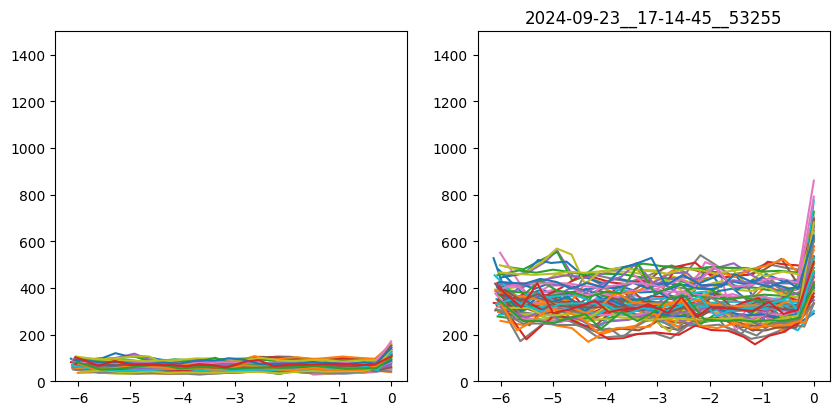

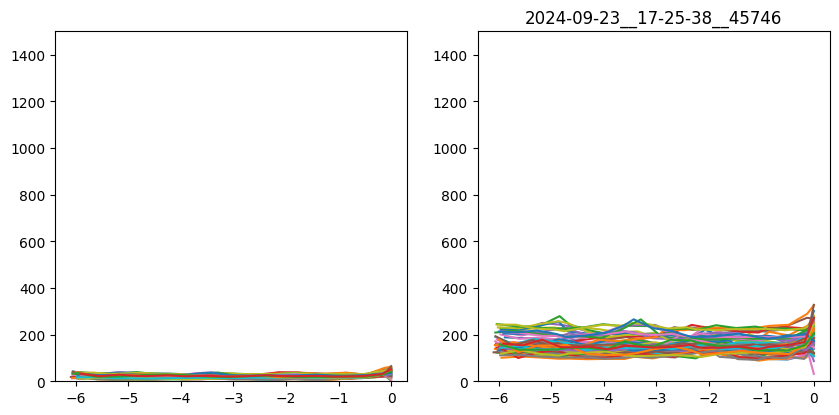

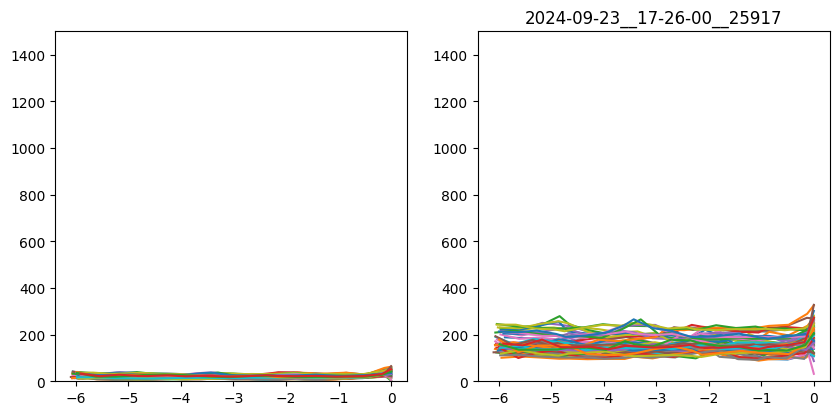

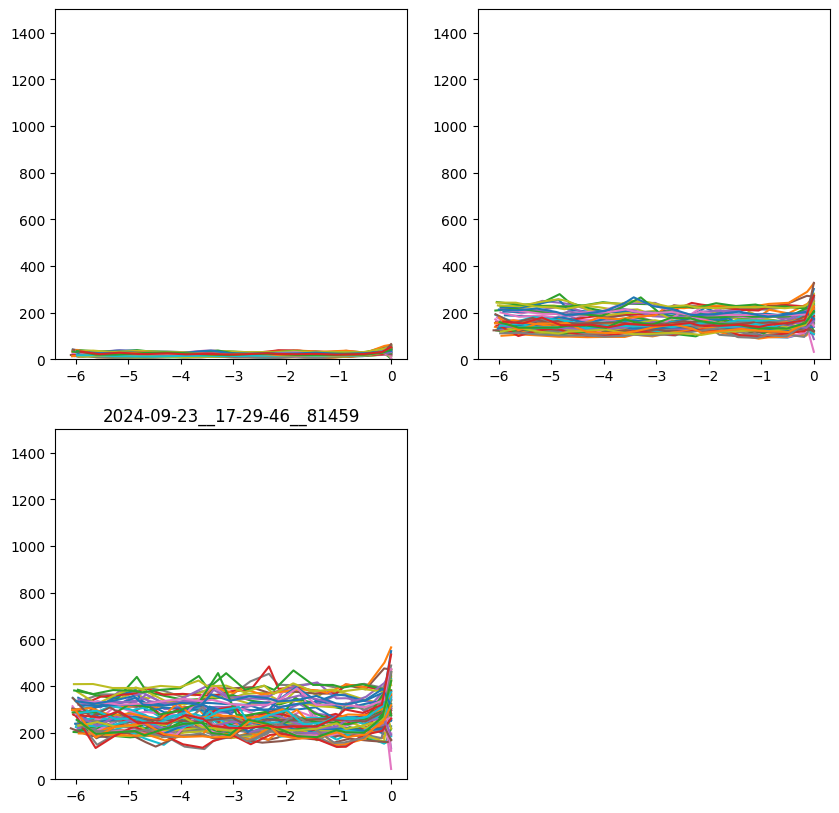

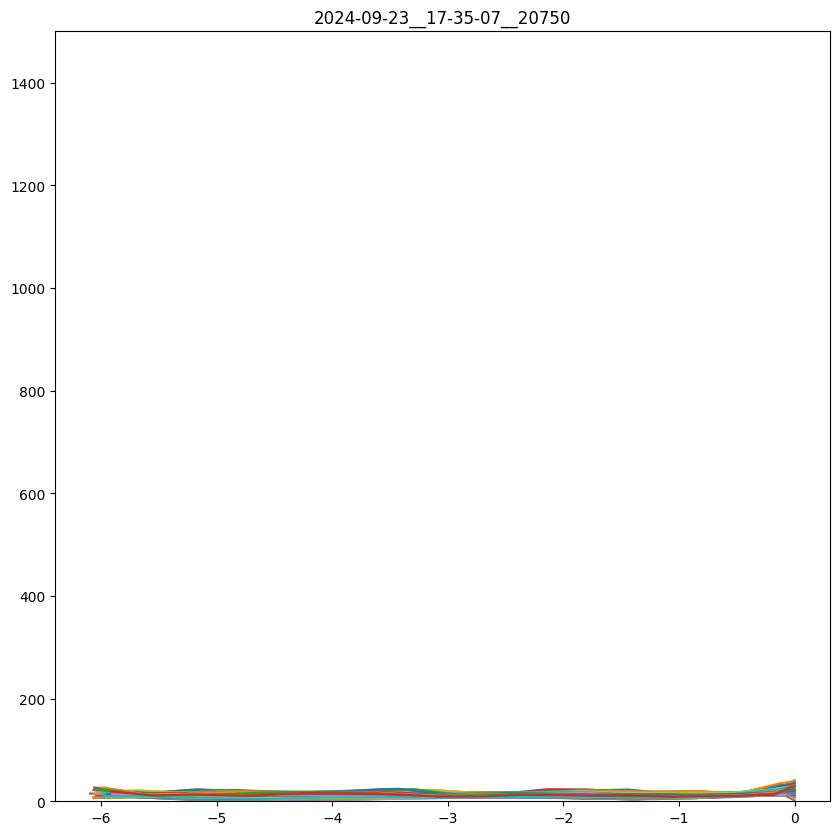

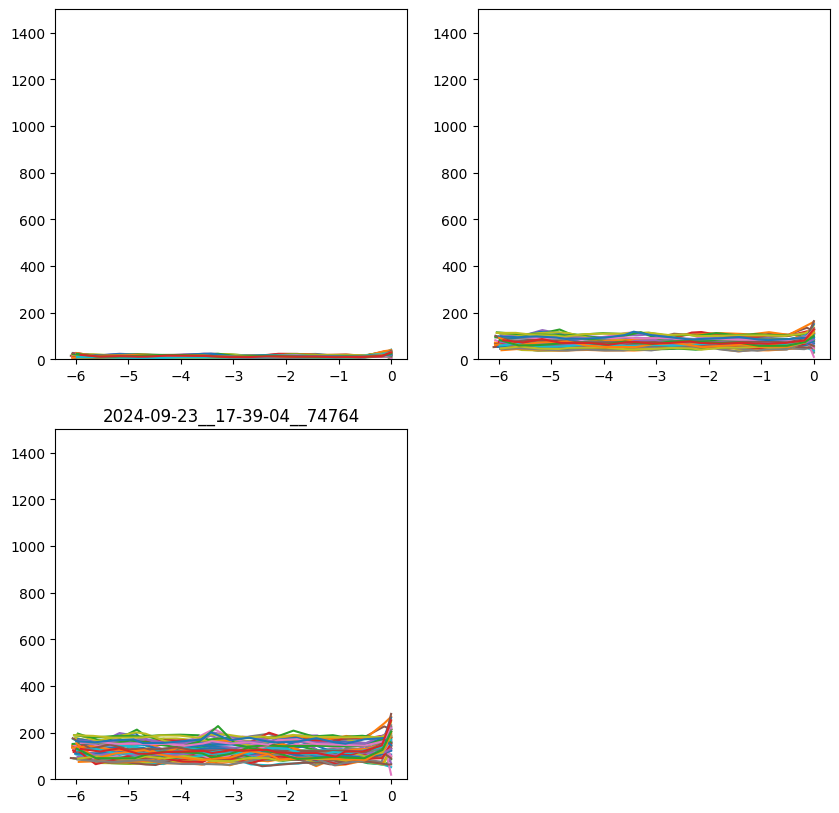

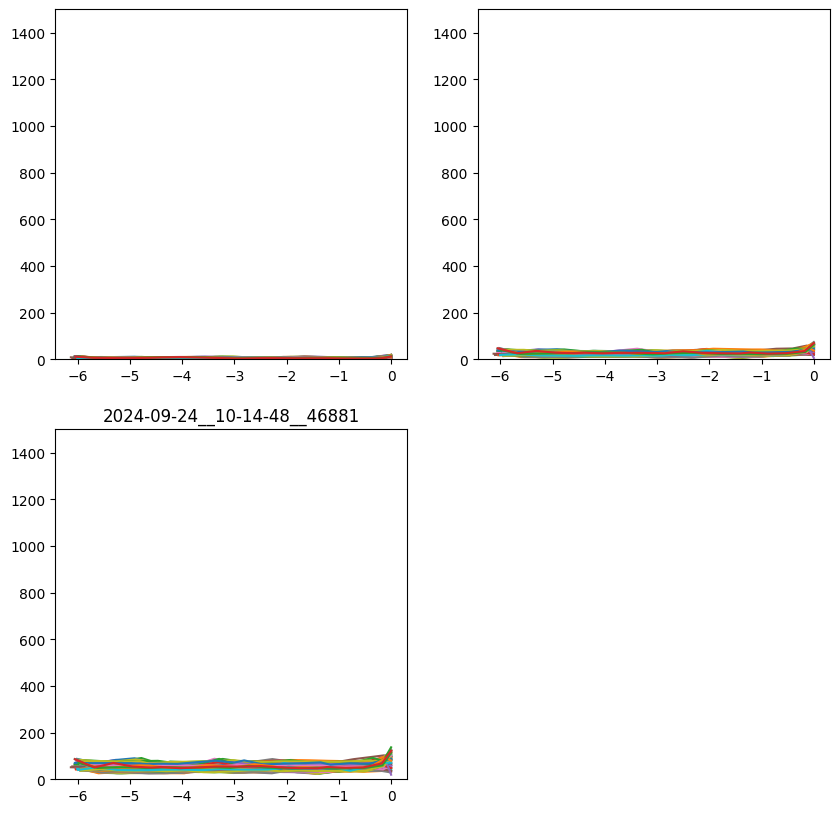

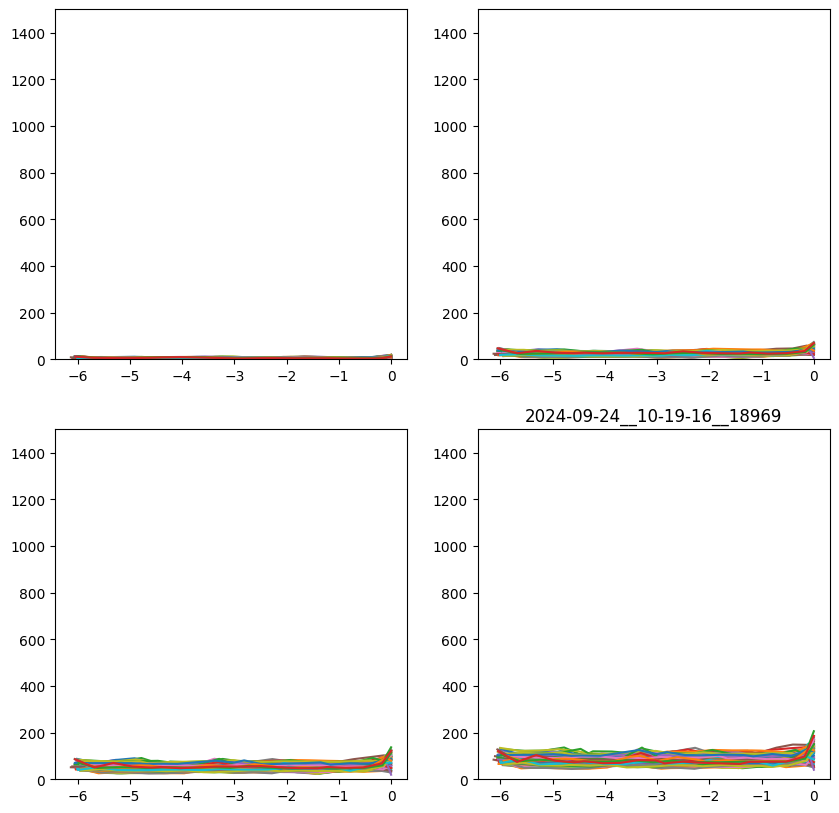

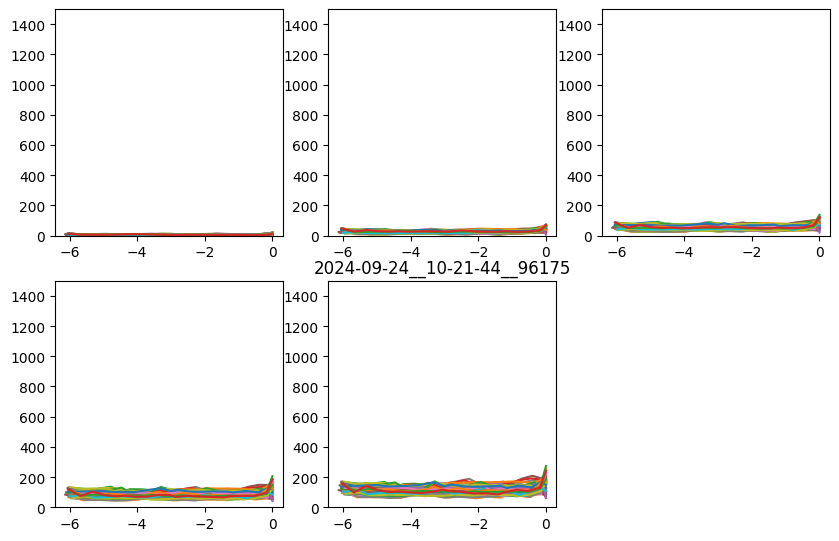

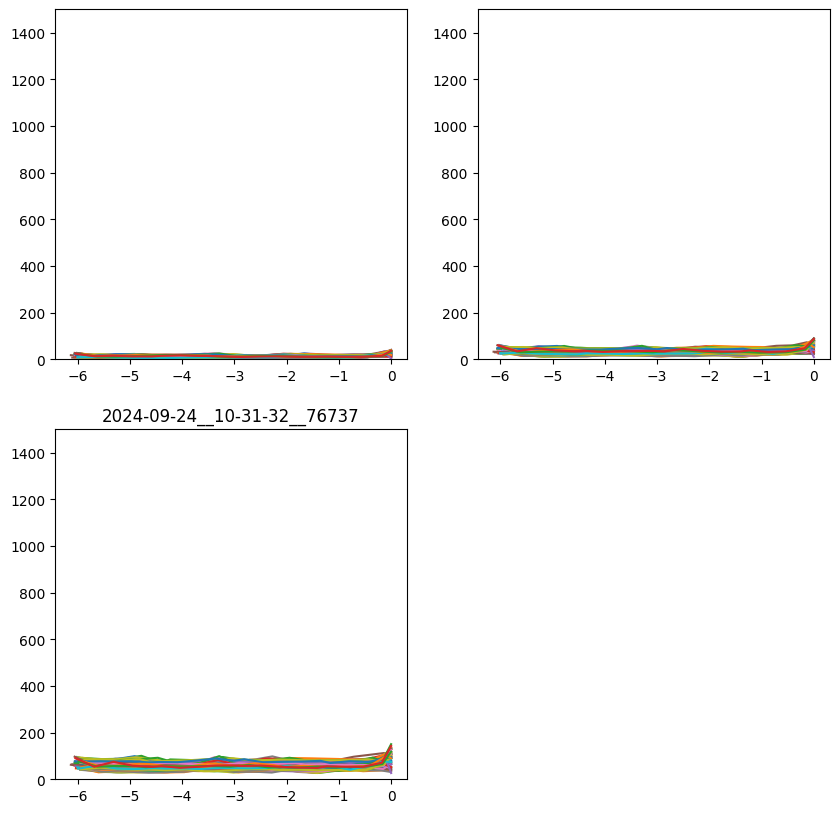

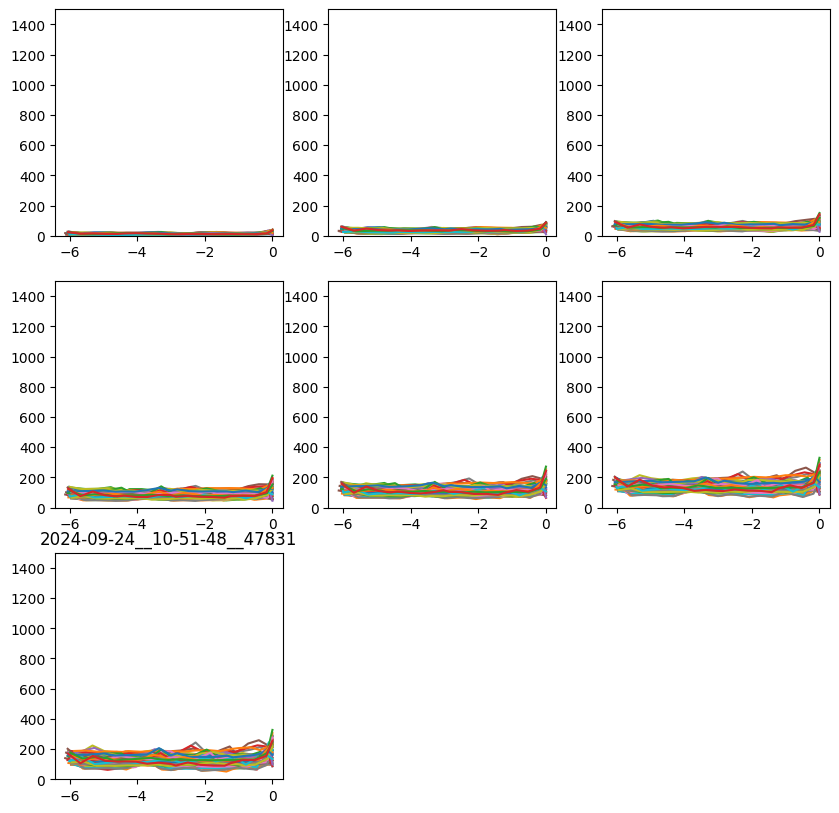

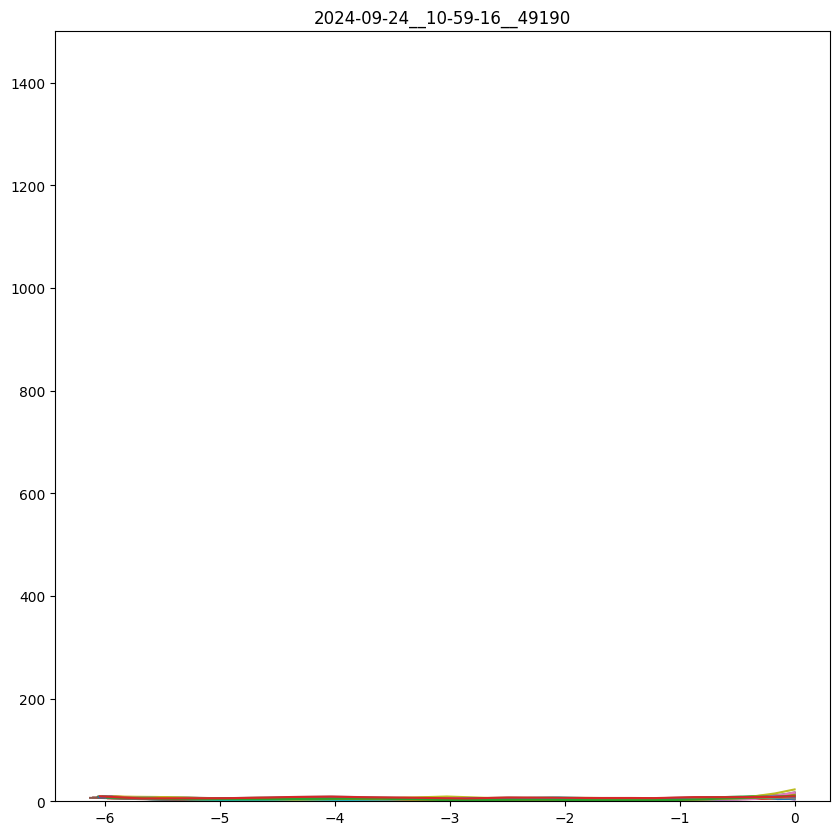

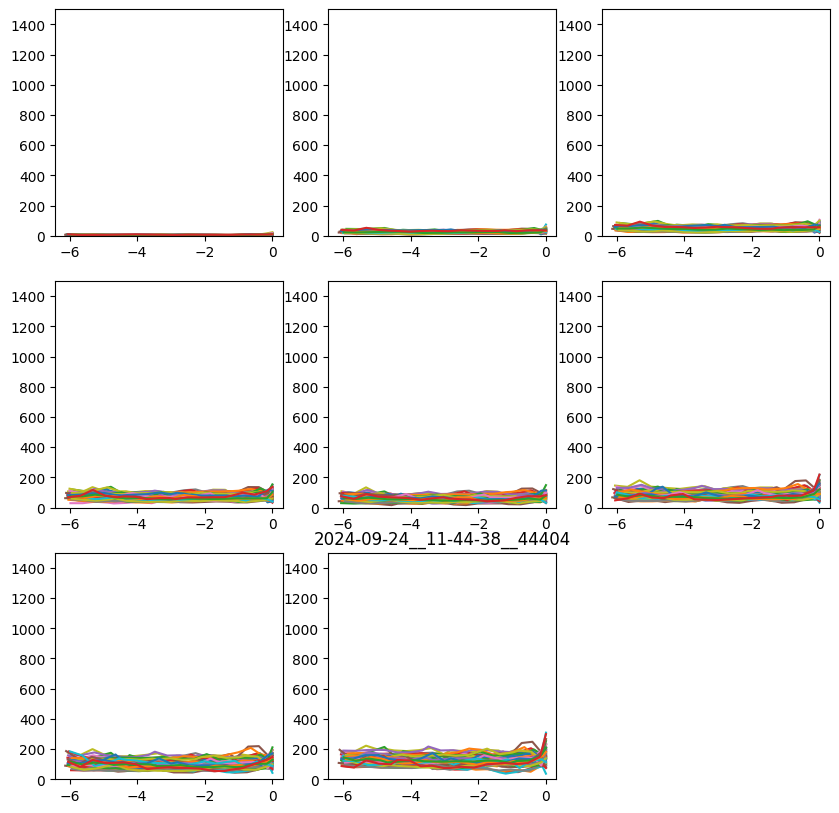

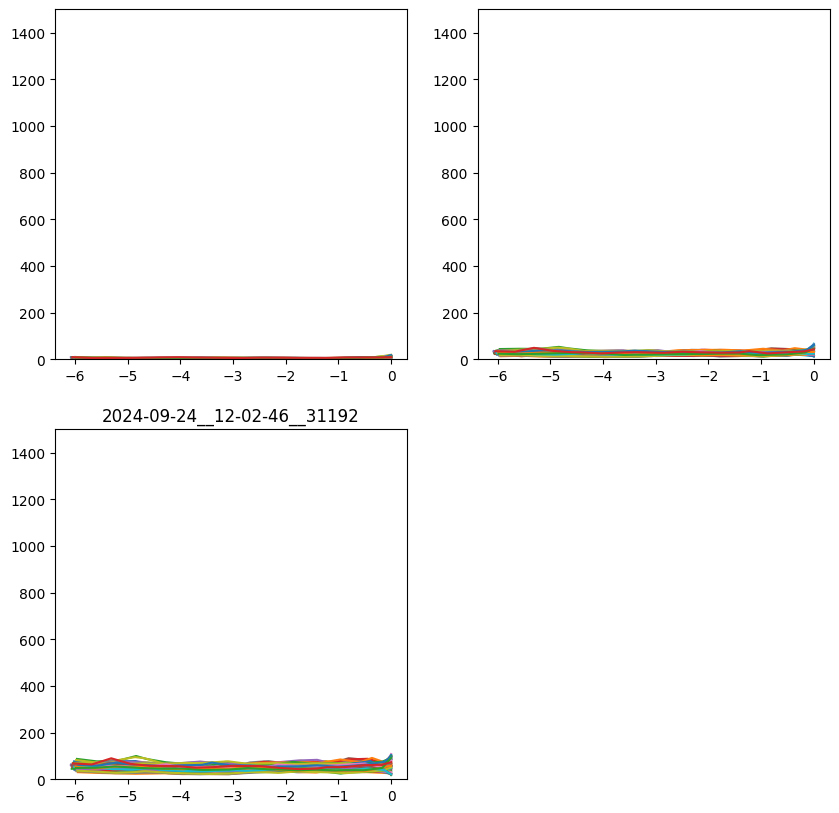

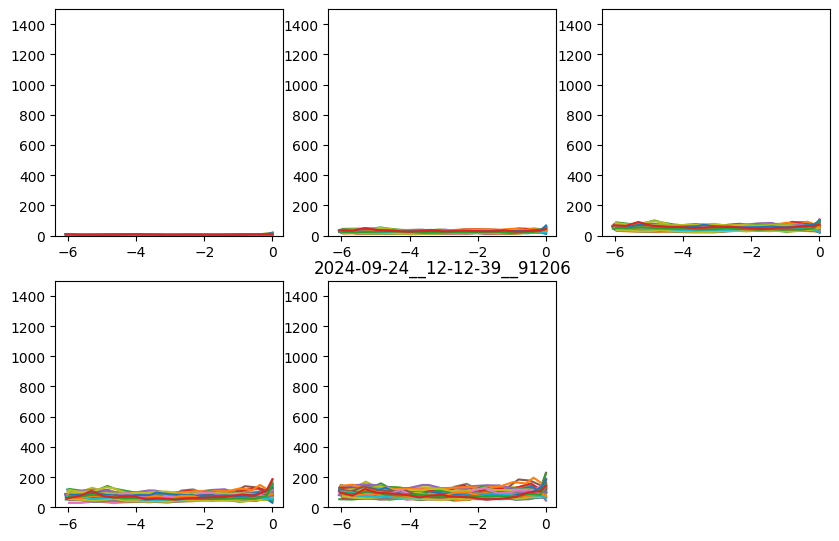

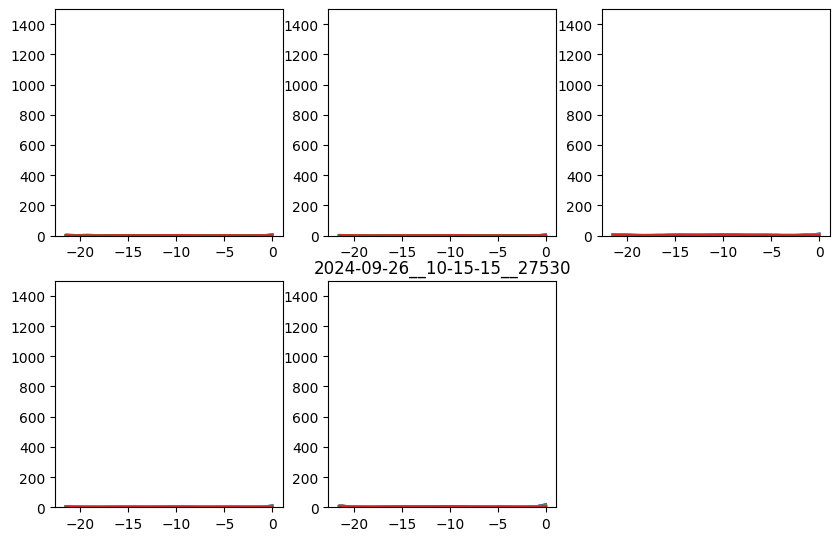

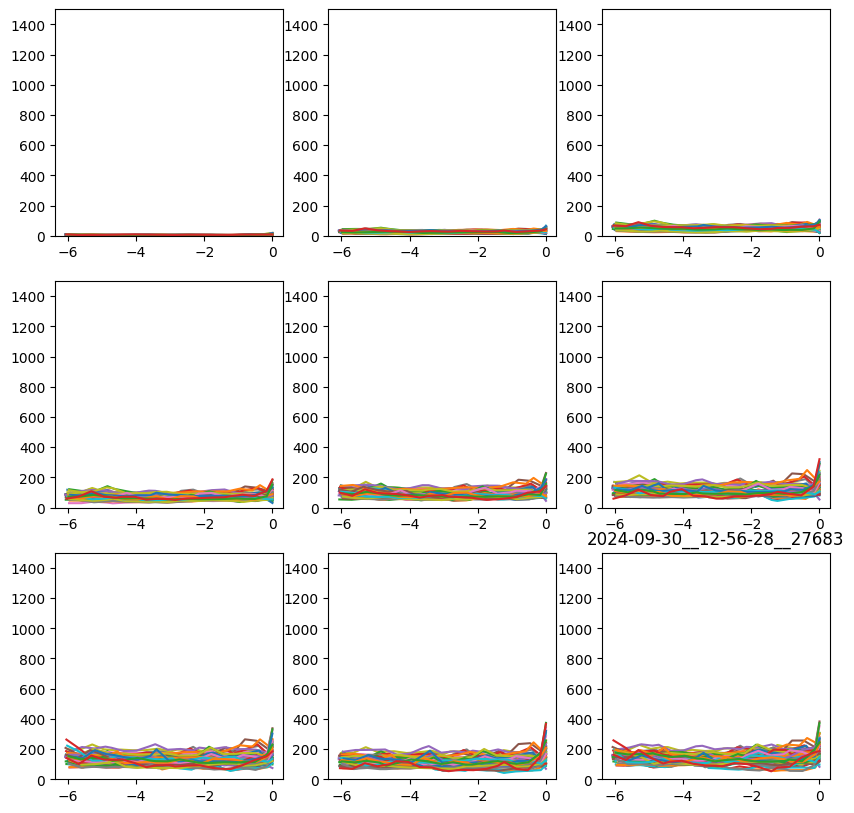

In [10]:
for k in range(len(results)):
    fig = plt.figure(figsize=(10,10))
    nms = len(results[k]["measurements"])
    nnsqrt_plots = np.ceil(np.sqrt(nms))
    nnsqrt_plots = int(nnsqrt_plots)

    for i in range(nms):

        plt.subplot(nnsqrt_plots, nnsqrt_plots, i+1)

        mt = results[k]["measurements"][i]["mt"]
        mt_z = results[k]["measurements"][i]["mt_z"] 

        for imt,imt_z in zip(mt,mt_z):
            imt_z = np.array(imt_z)
            imt_z = imt_z - imt_z[0]
            plt.plot(imt_z,imt)
        
        plt.ylim(0,1500)
    
    plt.title(results[k]["id_sim"])

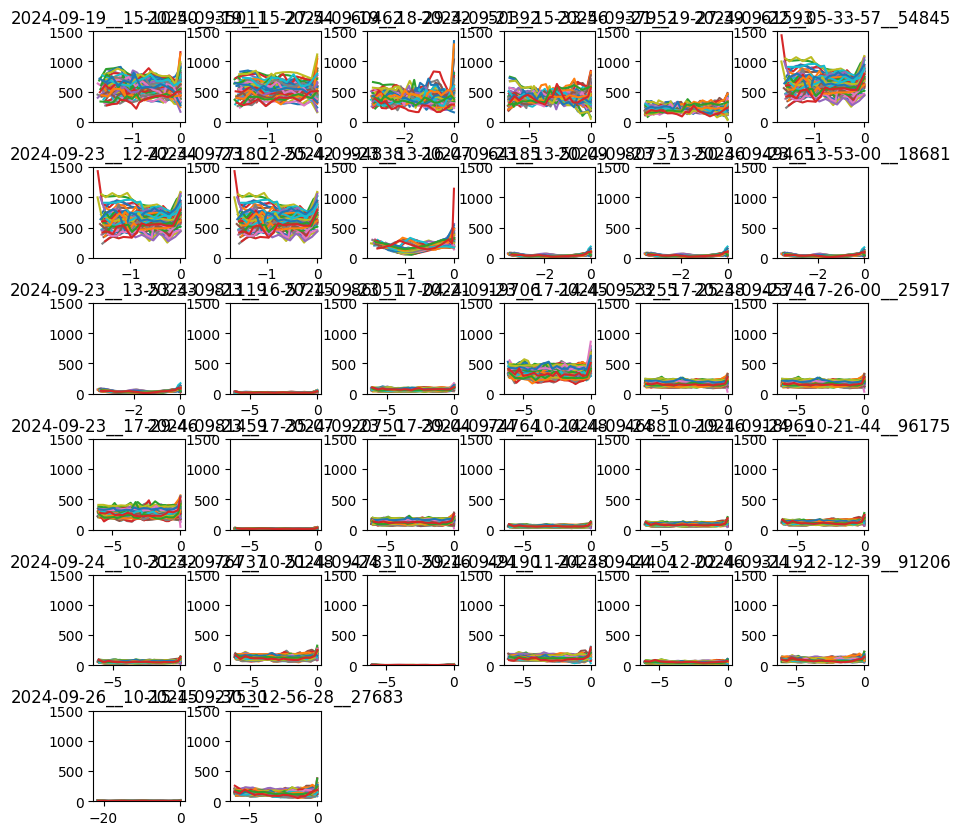

In [11]:
nms = len(results)

nnsqrt_plots = np.ceil(np.sqrt(nms))
nnsqrt_plots = int(nnsqrt_plots)
fig = plt.figure(figsize=(10,10))
# padding subplots
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for k in range(len(results)):

    plt.subplot(nnsqrt_plots, nnsqrt_plots, k+1)
    i = -1


    mt = results[k]["measurements"][i]["mt"]
    mt_z = results[k]["measurements"][i]["mt_z"] 

    for imt,imt_z in zip(mt,mt_z):
    
        imt_z = np.array(imt_z)
        imt_z = imt_z - imt_z[0]
        plt.plot(imt_z,imt)
    
    plt.ylim(0,1500)
    
    plt.title(results[k]["id_sim"])

In [12]:
len(mt_z)

64

In [13]:
from matplotlib import pyplot as plt
import numpy as np

In [14]:
len(results)

32

In [15]:
results[0]

{'id_sim': '2024-09-19__15-10-50__35011',
 'step_str_uq': array(['step_01', 'step_02', 'step_03', 'step_04'], dtype='<U7'),
 'sigma_max': array([ 26.34232204, 316.4178114 , 663.70750002, 911.39782169]),
 'epsilon': array([0.08768388, 0.35072992, 0.61378158, 0.87682761]),
 'Ftotal': array([  1.24165755,  34.6566105 , 105.61684129, 168.2772485 ]),
 'h': 14.237580932429118,
 'measurements': array([{'sigma_max': 26.34232203688855, 'F_total': 12.180660611999773, 'Ftrenzado': 12.180660611999773, 'Falma': 0.0, 'Delta_L': 0.15617999999999999, 'mt': [[27.976762160289944, 27.976762160289944, 17.66061631055015, 18.02998650532256, 18.02998650532256, 15.452754428860441, 11.044034369057742, 11.044034369057742, 8.690219655169233, 7.845713336259723, 7.845713336259723, 6.009442767799244, 5.50563730064175, 5.50563730064175, 6.03555818191874, 7.526555240925377, 7.526555240925377, 9.147268737305954, 11.735438534471028, 13.723080946367924], [26.495400143219467, 26.495400143219467, 22.24563174110659, 22.245

In [16]:
results = results[-7:]

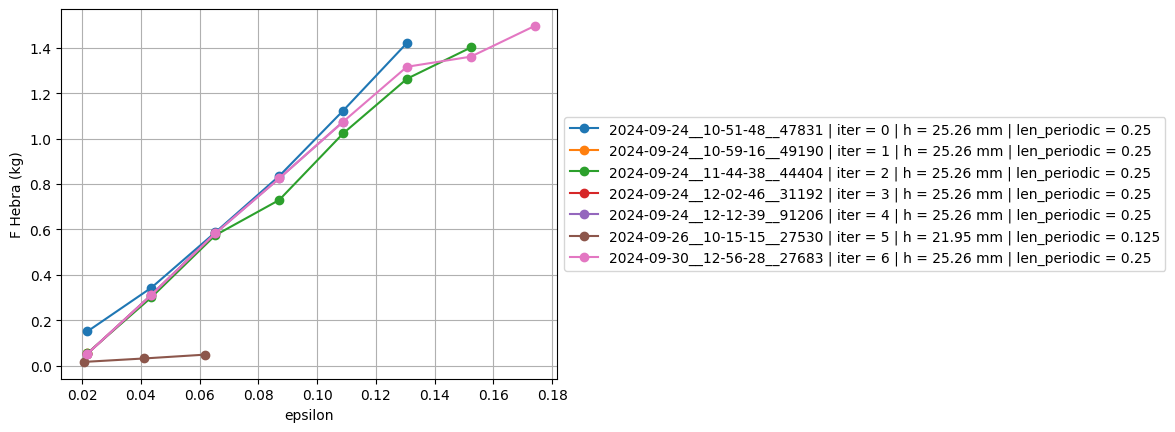

In [17]:
# linear regression
iter = -1
for r in results:
    h = r["h"]
    iter += 1
    id_sim = r["id_sim"]
    step_str_uq = r["step_str_uq"]
    sigma_max = r["sigma_max"]
    epsilon = r["epsilon"]
    Ftotal = r["Ftotal"]
    # if r["len_periodic"] != 0.5:
    #     continue

    Fmax =  sigma_max*A_hebra/9.81
    label = f"{id_sim}" + f" | iter = {iter} | h = {round(h,2)} mm | len_periodic = {r['len_periodic']}"

    plt.plot(epsilon,Fmax,label=label,marker="o")

F_trenzado_con_alma = 142 # kg
#
plt.ylabel("F Hebra (kg)")
plt.xlabel("epsilon")
plt.grid()
# outside
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

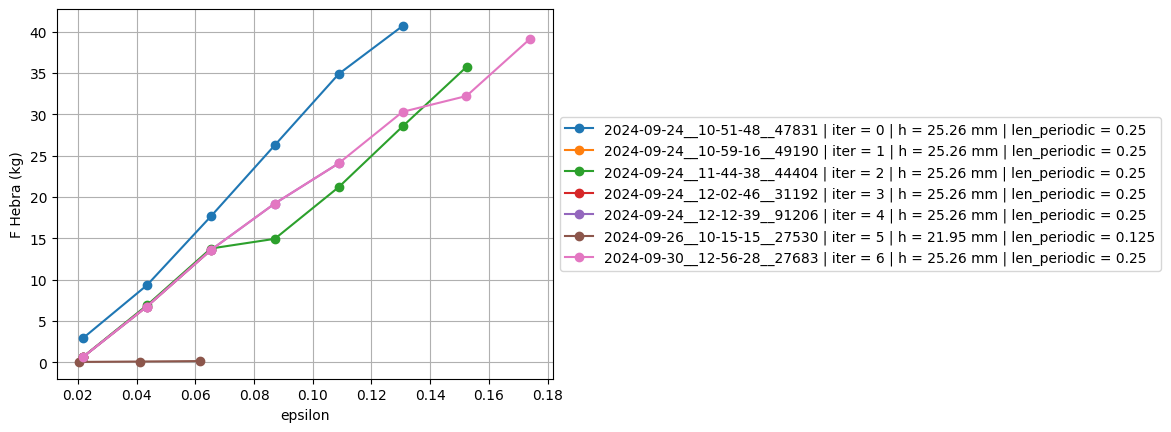

In [18]:
# linear regression
iter = -1
for r in results:
    h = r["h"]
    iter += 1
    id_sim = r["id_sim"]
    step_str_uq = r["step_str_uq"]
    sigma_max = r["sigma_max"]
    epsilon = r["epsilon"]
    Ftotal = r["Ftotal"]
    # if r["len_periodic"] != 0.5:
    #     continue

    Fmax =  sigma_max*A_hebra/9.81
    label = f"{id_sim}" + f" | iter = {iter} | h = {round(h,2)} mm | len_periodic = {r['len_periodic']}"

    plt.plot(epsilon,Ftotal,label=label,marker="o")

F_trenzado_con_alma = 142 # kg
#
plt.ylabel("F Hebra (kg)")
plt.xlabel("epsilon")
plt.grid()
# outside
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

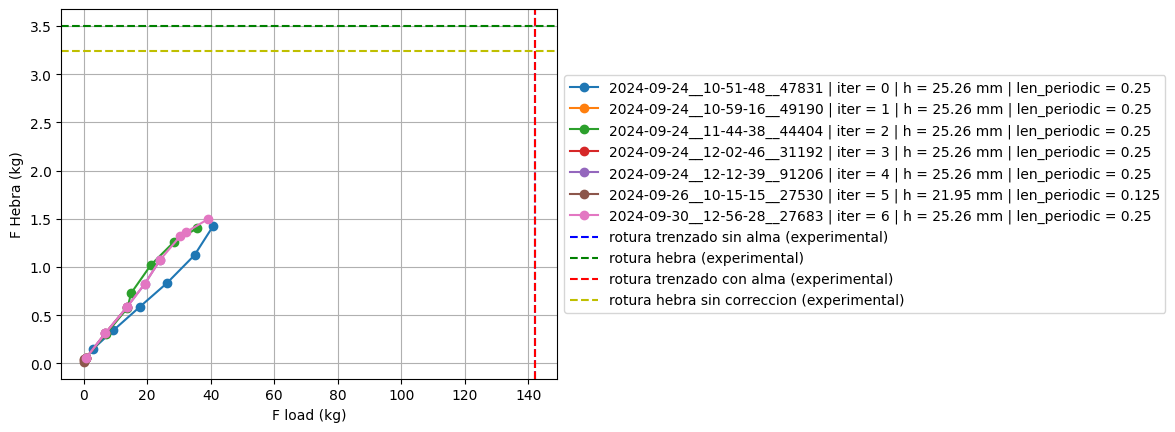

In [19]:
# linear regression
iter = -1
for r in results:
    h = r["h"]
    iter += 1
    id_sim = r["id_sim"]
    step_str_uq = r["step_str_uq"]
    sigma_max = r["sigma_max"]
    epsilon = r["epsilon"]
    Ftotal = r["Ftotal"]
    # if r["len_periodic"] != 0.5:
    #     continue

    Fmax =  sigma_max*A_hebra/9.81
    label = f"{id_sim}" + f" | iter = {iter} | h = {round(h,2)} mm | len_periodic = {r['len_periodic']}"

    plt.plot(Ftotal,Fmax,label=label,marker="o")
plt.axvline(x=F_trenzado_kg, color='b', linestyle='--',label="rotura trenzado sin alma (experimental)")
plt.axhline(y=F_hebra_kg, color='g', linestyle='--',label="rotura hebra (experimental)")


plt.axvline(x=F_trenzado_con_alma, color='r', linestyle='--',label="rotura trenzado con alma (experimental)")
plt.axhline(y=F_hebra_sin_corr, color='y', linestyle='--',label="rotura hebra sin correccion (experimental)")

F_trenzado_con_alma = 142 # kg
#
plt.ylabel("F Hebra (kg)")
plt.xlabel("F load (kg)")
plt.grid()
# outside
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

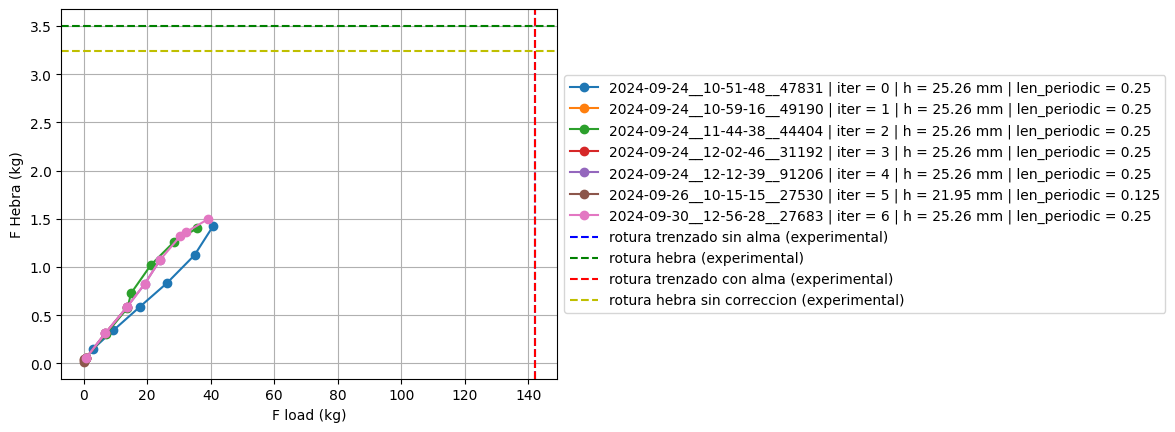

In [20]:
# linear regression
iter = -1
for r in results:
    h = r["h"]
    iter += 1
    id_sim = r["id_sim"]
    step_str_uq = r["step_str_uq"]
    sigma_max = r["sigma_max"]
    epsilon = r["epsilon"]
    Ftotal = r["Ftotal"]
    if r["len_periodic"] == 0.5:
        continue

    Fmax =  sigma_max*A_hebra/9.81
    label = f"{id_sim}" + f" | iter = {iter} | h = {round(h,2)} mm | len_periodic = {r['len_periodic']}"

    plt.plot(Ftotal,Fmax,label=label,marker="o")
plt.axvline(x=F_trenzado_kg, color='b', linestyle='--',label="rotura trenzado sin alma (experimental)")
plt.axhline(y=F_hebra_kg, color='g', linestyle='--',label="rotura hebra (experimental)")


plt.axvline(x=F_trenzado_con_alma, color='r', linestyle='--',label="rotura trenzado con alma (experimental)")
plt.axhline(y=F_hebra_sin_corr, color='y', linestyle='--',label="rotura hebra sin correccion (experimental)")

F_trenzado_con_alma = 142 # kg
#
plt.ylabel("F Hebra (kg)")
plt.xlabel("F load (kg)")
plt.grid()
# outside
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

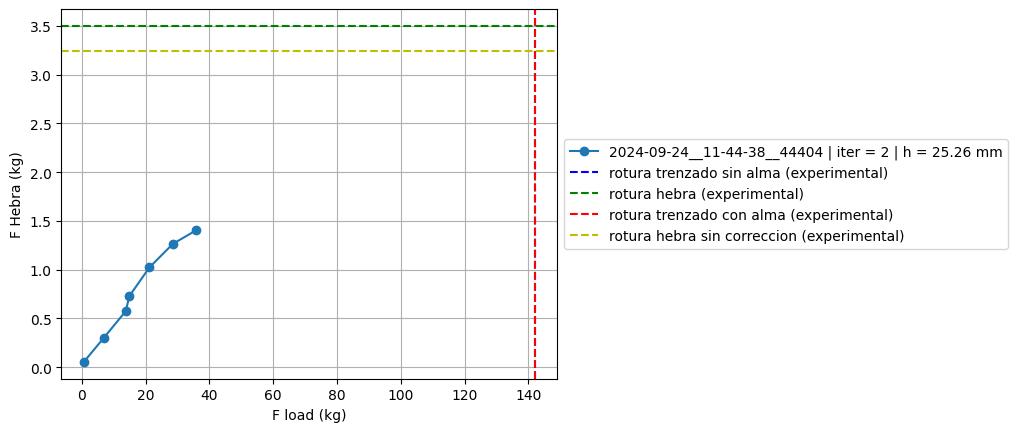

In [21]:
# linear regression
iter = -1
iter = 2
r =  results[iter]
id_sim = r["id_sim"]
step_str_uq = r["step_str_uq"]
sigma_max = r["sigma_max"]
epsilon = r["epsilon"]
Ftotal = r["Ftotal"]
h = r["h"]
Fmax =  sigma_max*A_hebra/9.81
label = f"{id_sim}" + f" | iter = {iter} | h = {round(h,2)} mm"
plt.plot(Ftotal,Fmax,label=label,marker="o")
plt.axvline(x=F_trenzado_kg, color='b', linestyle='--',label="rotura trenzado sin alma (experimental)")
plt.axhline(y=F_hebra_kg, color='g', linestyle='--',label="rotura hebra (experimental)")


plt.axvline(x=F_trenzado_con_alma, color='r', linestyle='--',label="rotura trenzado con alma (experimental)")
plt.axhline(y=F_hebra_sin_corr, color='y', linestyle='--',label="rotura hebra sin correccion (experimental)")

F_trenzado_con_alma = 142 # kg
#
plt.ylabel("F Hebra (kg)")
plt.xlabel("F load (kg)")
plt.grid()
# outside
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [22]:
F_trenzado_con_alma

142

In [23]:
Ftotal = results[-1]["Ftotal"][-1]
Ftrenzado = results[-1]["Ftrenzado"][-1]
Falma = results[-1]["Falma"][-1]

print(f"Ftotal = {Ftotal} kg")
print(f"Ftrenzado = {Ftrenzado} kg")
print(f"Falma = {Falma} kg")


KeyError: 'Ftrenzado'

In [ ]:
Falmas = [i["Falma"][-1] for i in results]
Ftotals = [i["Ftotal"][-1] for i in results]
Fmaxs = [i["sigma_max"][-1]*A_hebra/9.81 for i in results]
ratio = [iFmax/iFtotal for iFmax,iFtotal in zip(Fmaxs,Ftotals)]
error = [ np.sqrt((iratio - F_hebra_kg/F_trenzado_kg)**2) for iratio in ratio]

In [ ]:
F_trenzado_kg

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({"Ftotal":Ftotals,"Falma":Falmas,"Fmax":Fmaxs,"error":error,"ratio":ratio})

In [ ]:
# sort by error
df = df.sort_values(by="error")

In [ ]:
df

In [ ]:
# Ratio 
ratio = Ftrenzado/Falma	

print(f"ratio = {ratio:.3f}")